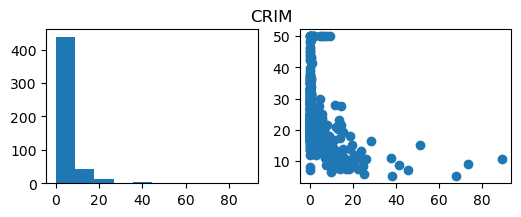

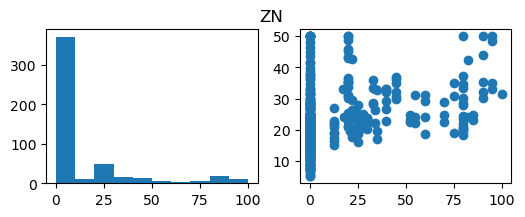

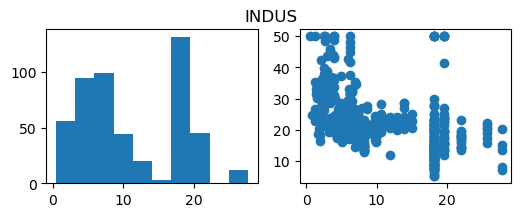

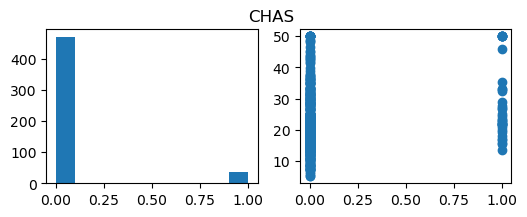

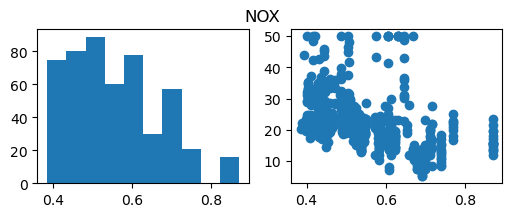

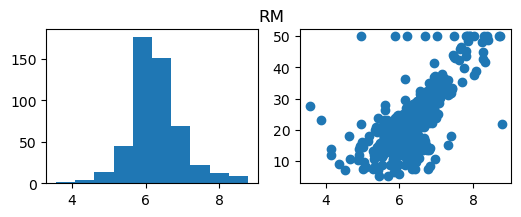

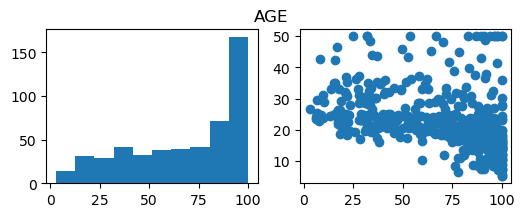

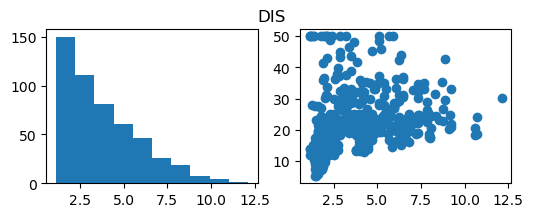

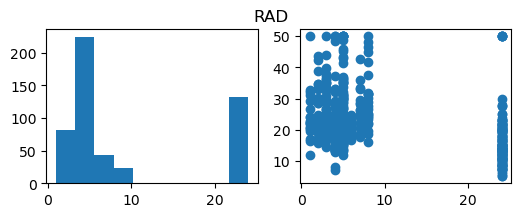

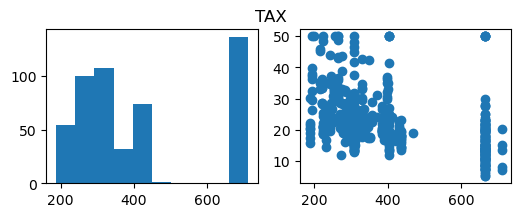

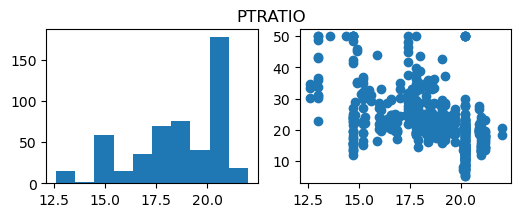

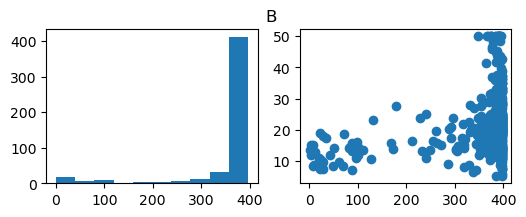

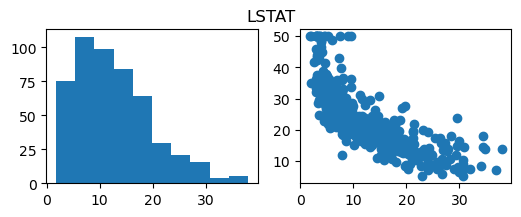

In [354]:
import pandas as pd
import copy
import math
# Load data
data = pd.read_excel("Boston_Housing.xlsx")

data.shape
# (506, 14)
# Split up predictors and target
y = data['MEDV']
X = data.drop(columns=['MEDV'])
import numpy as np
import matplotlib.pyplot as plt

# Distribution of predictors and relationship with target
for col in X.columns:
    fig, ax = plt.subplots(1, 2, figsize=(6,2))
    ax[0].hist(X[col])
    ax[1].scatter(X[col], y)
    fig.suptitle(col)
    plt.show()

def compute_cost(X, y, w, b): 
    m = X.shape[0] 

    f_wb = np.dot(X, w) + b
    cost = np.sum(np.power(f_wb - y, 2))

    total_cost = 1 / (2 * m) * cost

    return total_cost
def compute_gradient(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    err = (np.dot(X, w) + b) - y
    dj_dw = np.dot(X.T, err)    # dimension: (n,m)*(m,1)=(n,1)
    dj_db = np.sum(err)

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost = cost_function(X, y, w, b)
        J_history.append(cost)

        if i % math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}")

    return w, b, J_history

In [355]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
iterations = 1000
alpha = 1.0e-6

w_init = np.zeros(X_train.shape[1],) # shape = (13,) for Boston Housing
b_init = 0.0

w_out, b_out, J_hist = gradient_descent(X_train, y_train, w_init, b_init, compute_cost, compute_gradient, alpha, iterations)

Iteration    0: Cost   174.68
Iteration  100: Cost    37.31
Iteration  200: Cost    36.67
Iteration  300: Cost    36.31
Iteration  400: Cost    35.98
Iteration  500: Cost    35.69
Iteration  600: Cost    35.43
Iteration  700: Cost    35.19
Iteration  800: Cost    34.97
Iteration  900: Cost    34.77


In [356]:
def plot_cost(data, cost_type):
    plt.figure(figsize=(4,2))
    plt.plot(data)
    plt.xlabel("Iteration Step")
    plt.ylabel(cost_type)
    plt.title("Cost vs. Iteration")
    plt.show() 

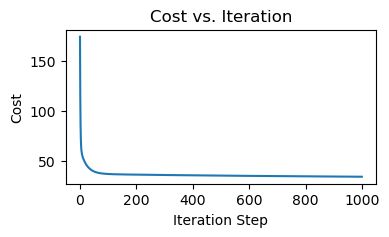

In [357]:
plot_cost(J_hist, "Cost")

In [358]:
def predict(X, w, b):
    p = np.dot(X, w) + b
    return p

In [359]:
y_pred = predict(X_test, w_out, b_out)
print(y_pred)

[23.87488531 25.4462549  23.27911833  0.38094571 23.85984042 22.81814986
 28.29906791 23.60729497 19.11100899  4.97875943 24.29629545 22.46871956
 23.48719791 23.52401161 27.94125919 22.52476234 23.5216841  23.54300358
 23.84126618 23.62592535 24.04194851 14.43308648 27.87338551 25.10477022
 22.96283688 24.43389296 22.55164721 23.08413709 23.51421189 23.63528288
 23.7876206  24.60964265 24.77514683 27.76091876 23.37928442 23.5859306
 22.95879983 23.69574321 24.20081403 23.35140904 25.10523359 19.45968565
 23.6007474  23.62596468 21.81726011 23.52903648 22.32788553 25.75110563
 22.82702067 24.25861298 22.9855288  23.89260912 20.89691309 22.66317021
  0.87075742 23.33290881 17.76448339 23.42186483 23.20488748 23.01754404
 23.23795481  1.69159947 25.89598655 23.59824584 23.66694424 23.58106735
 23.30321349 23.7060501  22.68973658 23.6497127  23.70054511 24.62228019
  6.25830367 23.7960958  27.72495063 22.92866808  1.46253596 23.64360686
 17.33206855 23.51490225 20.06088144 23.42948014 19.

In [360]:
def compute_mse(y1, y2):
    return np.mean(np.power((y1 - y2),2))
mse = compute_mse(y_test, y_pred)
print(mse)

101.54460430733967


In [361]:
def plot_pred_actual(y_actual, y_pred):
    x_ul = int(math.ceil(max(y_actual.max(), y_pred.max()) / 10.0)) * 10
    y_ul = x_ul

    plt.figure(figsize=(4,4))
    plt.scatter(y_actual, y_pred)
    plt.xlim(0, x_ul)
    plt.ylim(0, y_ul)
    plt.xlabel("Actual values")
    plt.ylabel("Predicted values")
    plt.title("Predicted vs Actual values")
    plt.show()

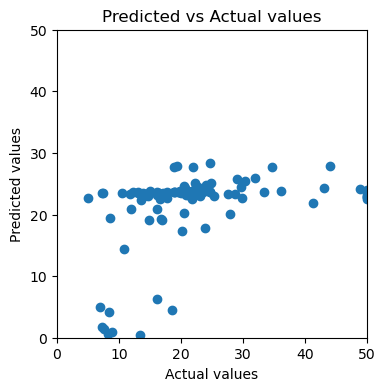

In [362]:
# Generate predictions
y_pred = np.dot(X_test, w_out) + b_out

# Plot predicted vs actual values
plot_pred_actual(y_test, y_pred)

In [363]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_train_norm = standard_scaler.fit_transform(X_train)
X_test_norm = standard_scaler.transform(X_test)

In [364]:
iterations = 1000
alpha = 1.0e-2

w_out, b_out, J_hist = gradient_descent(X_train_norm, y_train, w_init, b_init, compute_cost, compute_gradient, alpha, iterations)

print(f"Training result: w = {w_out}, b = {b_out}")
print(f"Training MSE = {J_hist[-1]}")

Iteration    0: Cost   288.73
Iteration  100: Cost    45.57
Iteration  200: Cost    15.00
Iteration  300: Cost    10.77
Iteration  400: Cost    10.10
Iteration  500: Cost     9.94
Iteration  600: Cost     9.86
Iteration  700: Cost     9.81
Iteration  800: Cost     9.77
Iteration  900: Cost     9.75
Training result: w = [-0.77342753  0.76076201 -0.46049709  0.72504636 -1.42543371  2.85903599
 -0.2314194  -2.543158    1.38333539 -0.94881823 -1.78787899  0.53985394
 -3.32989984], b = 22.69184210475462
Training MSE = 9.722910288976374


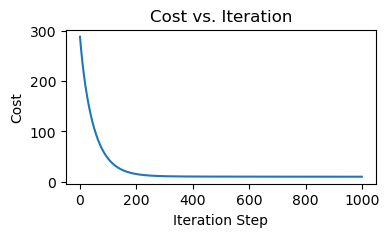

In [365]:
plot_cost(J_hist, "Cost")

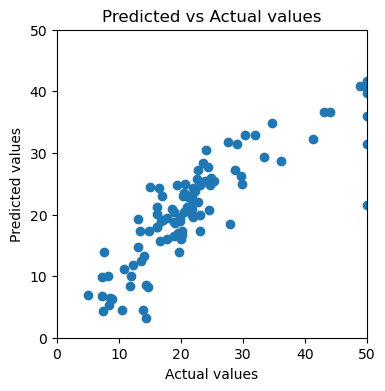

In [366]:
y_pred = np.dot(X_test_norm, w_out) + b_out
plot_pred_actual(y_test, y_pred)

In [367]:
mse = compute_mse(y_test, y_pred)
print(f"Test MSE = {mse}")

Test MSE = 34.637184694487


In [368]:
def compute_cost_ridge(X, y, w, b, lambda_ = 1): 
    m = X.shape[0] 

    f_wb = np.dot(X, w) + b
    cost = np.sum(np.power(f_wb - y, 2))    

    reg_cost = np.sum(np.power(w, 2))

    total_cost = 1 / (2 * m) * cost + (lambda_ / (2 * m)) * reg_cost

    return total_cost

In [369]:
def compute_gradient_ridge(X, y, w, b, lambda_):
    m = X.shape[0]

    err = np.dot(X, w) + b - y
    dj_dw = np.dot(X.T, err) / m + (lambda_ / m) * w
    dj_db = np.sum(err) / m

    return dj_db, dj_dw

In [370]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, lambda_=0.7, num_iters=1000):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X, y, w, b, lambda_)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost = cost_function(X, y, w, b, lambda_)
        J_history.append(cost)

        if i % math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}")

    return w, b, J_history

In [371]:
iterations = 1000
alpha = 1.0e-2
lambda_ = 1

w_out, b_out, J_hist = gradient_descent(X_train_norm, y_train, w_init, b_init, compute_cost_ridge, compute_gradient_ridge, alpha, lambda_, iterations)

Iteration    0: Cost   288.73
Iteration  100: Cost    45.60
Iteration  200: Cost    15.03
Iteration  300: Cost    10.81
Iteration  400: Cost    10.14
Iteration  500: Cost     9.98
Iteration  600: Cost     9.91
Iteration  700: Cost     9.86
Iteration  800: Cost     9.82
Iteration  900: Cost     9.79


In [372]:
print(f"Training result: w = {w_out}, b = {b_out}")
print(f"Training MSE = {J_hist[-1]}")

Training result: w = [-0.76958171  0.75628267 -0.46295817  0.7254895  -1.41313614  2.85886363
 -0.23256703 -2.52468403  1.36804067 -0.94158359 -1.7836789   0.53985957
 -3.31972137], b = 22.69184210475462
Training MSE = 9.771250667444212


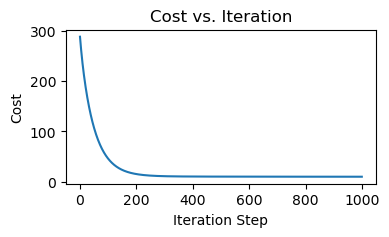

In [373]:
plot_cost(J_hist, "Cost")

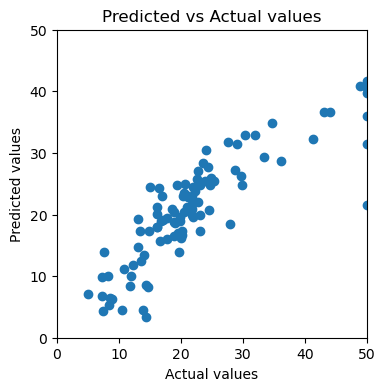

In [374]:
y_pred = np.dot(X_test_norm, w_out) + b_out
plot_pred_actual(y_test, y_pred)

In [375]:
def soft_threshold(rho, lamda_):
    if rho < - lamda_:
        return (rho + lamda_)
    elif rho >  lamda_:
        return (rho - lamda_)
    else: 
        return 0

In [376]:
def compute_residuals(X, y, w, b):
    return y - (np.dot(X, w) + b)

In [377]:
def compute_rho_j(X, y, w, b, j):
    X_k = np.delete(X, j, axis=1)    # remove the jth element
    w_k = np.delete(w, j)    # remove the jth element

    err = compute_residuals(X_k, y, w_k, b)

    X_j = X[:,j]
    rho_j = np.dot(X_j, err)

    return rho_j

In [378]:
def coordinate_descent_lasso(X, y, w_in, b_in, cost_function, lambda_, num_iters=1000, tolerance=1e-4):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    n = X.shape[1]

    for i in range(num_iters):
        # Update weights
        for j in range(n):
            X_j = X[:,j]
            rho_j = compute_rho_j(X, y, w, b, j)
            w[j] = soft_threshold(rho_j, lambda_) / np.sum(X_j ** 2)

        # Update bias
        b = np.mean(y - np.dot(X, w))
        err = compute_residuals(X, y, w, b)

        # Calculate total cost
        cost = cost_function(X, y, w, b, lambda_)
        J_history.append(cost)

        if i % math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}")

        # Check convergence
        if np.max(np.abs(err)) < tolerance:
            break

    return w, b, J_history

def compute_cost_lasso(X, y, weights, bias, lambda_ = 0.7):
    # Number of training examples
    num_examples = X.shape[0]

    # Make predictions using current weights and bias
    predictions = np.dot(X, weights) + bias

    # Calculate squared error between predictions and actual values
    squared_error = np.sum((predictions - y) ** 2)

    # L1 regularization: sum of absolute values of weights
    l1_penalty = np.sum(np.abs(weights))

    # Combine error and regularization into total cost
    total_cost = (1 / (2 * num_examples)) * squared_error + (lambda_ / (2 * num_examples)) * l1_penalty

    return total_cost


In [379]:
iterations = 1000
lambda_ = 1e-2
tolerance = 1

w_out, b_out, J_hist = coordinate_descent_lasso(X_train_norm, y_train, w_init, b_init, compute_cost_lasso, lambda_, iterations, tolerance)

Iteration    0: Cost    15.94
Iteration  100: Cost     9.61
Iteration  200: Cost     9.61
Iteration  300: Cost     9.61
Iteration  400: Cost     9.61
Iteration  500: Cost     9.61
Iteration  600: Cost     9.61
Iteration  700: Cost     9.61
Iteration  800: Cost     9.61
Iteration  900: Cost     9.61


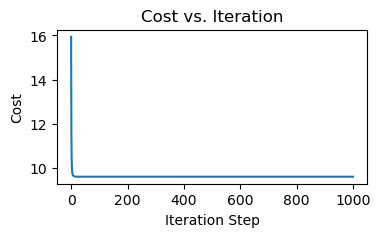

In [380]:
plot_cost(J_hist, "Cost")

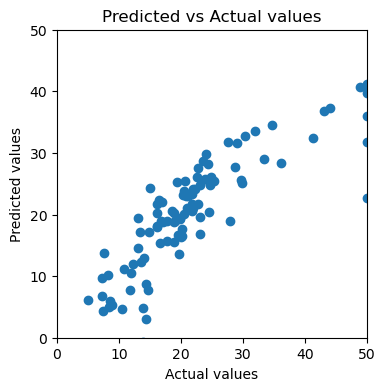

In [381]:
y_pred = np.dot(X_test_norm, w_out) + b_out
plot_pred_actual(y_test, y_pred)

In [382]:
print(f"Training result: w = {w_out}, b = {b_out}")

Training result: w = [-0.91848853  0.99539357 -0.07823686  0.66645017 -1.85645903  2.67340263
 -0.11726709 -2.84936812  2.43011428 -1.96666644 -1.88102001  0.53283901
 -3.4199916 ], b = 22.69282178217822


In [383]:
print(standard_scaler.scale_)

[7.26628074e+00 2.36238088e+01 6.88102162e+00 2.45386807e-01
 1.15854174e-01 6.72975718e-01 2.82747323e+01 2.11629979e+00
 8.48627775e+00 1.66803408e+02 2.11274416e+00 8.88963798e+01
 6.52160598e+00]


In [384]:
per_capita_crimerate = -0.91848853/7.2662

In [386]:
print(f"If the per capita crime rate increases by 1 percentage point, the median housing price of that location drops by ${1000 * per_capita_crimerate:.2f}")

If the per capita crime rate increases by 1 percentage point, the median housing price of that location drops by $-126.41
